# Music Converter Notebook

CSI4106 Artificial Intelligence   
Prepared by:

#### Introduction:
We start our project by first demonstrating with detailed notes how to decompose 1 song into features. Once this is complete, we will create a method which will repeat the process for 1000 songs.

This song is 30 seconds long.
The sampling rate of this file is: 22050. It represents how many times per second the audio is sampled.
The value "x" represents the wave form of a song, which contains 661504 slices.
The approximate duration of the song is: 30.00018140589569. Which is what we expect since all songs are 30 seconds long.


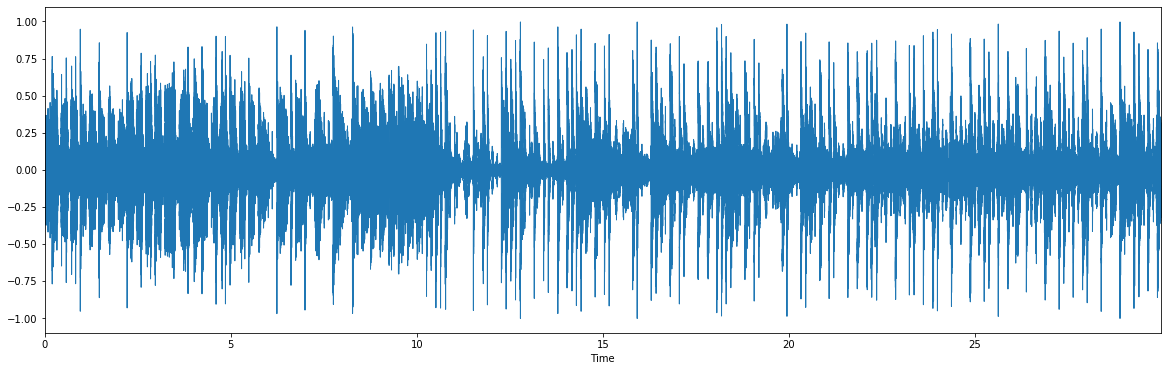

In [2]:
## Decomposing the first song in the Hip Hop folder into features

##### Step 1. Import the song file
import librosa
import matplotlib.pyplot as plt
import librosa.display
import sklearn

print("This song is 30 seconds long.")
file_path = '../resources/genres/hiphop/hiphop.00000.wav'

## Load an audio file as a floating point time series.
x , sampling_rate = librosa.load(file_path)


print("The sampling rate of this file is: {0}. It represents how many times ".format(sampling_rate) +
      "per second the audio is sampled.")
print("The value \"x\" represents the wave form of a song, which contains {0} slices.".format(x.shape[0]))
print("The approximate duration of the song is: {0}. Which is what we expect since all songs are 30 seconds long.".format(len(x)/sampling_rate))

## Plot the waveform of the loaded file
plt.figure(figsize=(20, 6))
librosa.display.waveplot(x, sr=sampling_rate)

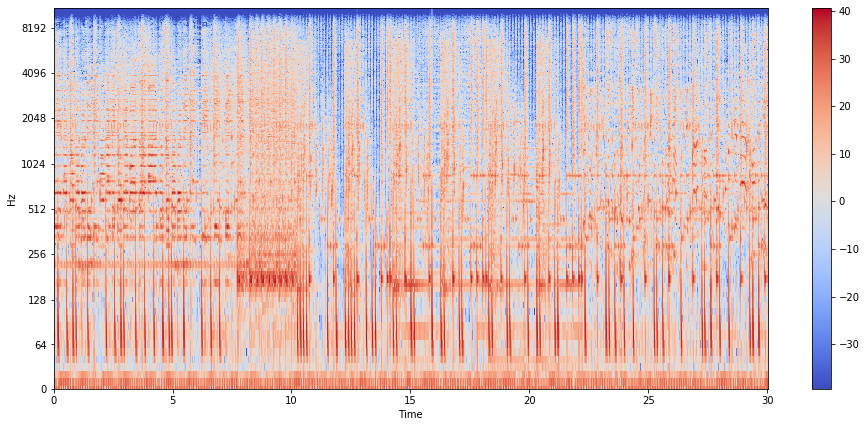

In [3]:
##### Step 2. Apply Short-Time Fourier Transform (STFT) to Decompose Wave Form to base frequencies

## This function converts our file into a time-frequency domain representation using short-time Fourier transform 
## (essentially this is the change of FFT's over time)
wav_form = librosa.stft(x)

## Plot the spectrogram of the STFT representation (we explain what this is below)
wav_form_db = librosa.amplitude_to_db(abs(wav_form))
plt.figure(figsize=(16,7))
librosa.display.specshow(wav_form_db, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar()


The STFT breaks down a signal into amplitude over time of each frequency. To demonstrate this more clearly, Figure 1 below shows a 3D spectrogram example from Wikipedia. To explain it more clearly, we'll take an example of a sound recording. The frequency axis represents all the possible frequencies in that recording. The time axis represents different times in the recording. The z or amplitude axis represents the amplitude (or level) of sound.

In the Figure, we can see that the amplitude of the low frequencies is also low. As the frequency gets higher, the amplitude also increases, meaning this recording was of a higher pitched sound.

The above plot represents the same thing as Figure 1 and has the same frequency and time axis. However, instead of a third dimension for amplitude, the above plot uses colour to show higher amplitudes across the 2D plane. 
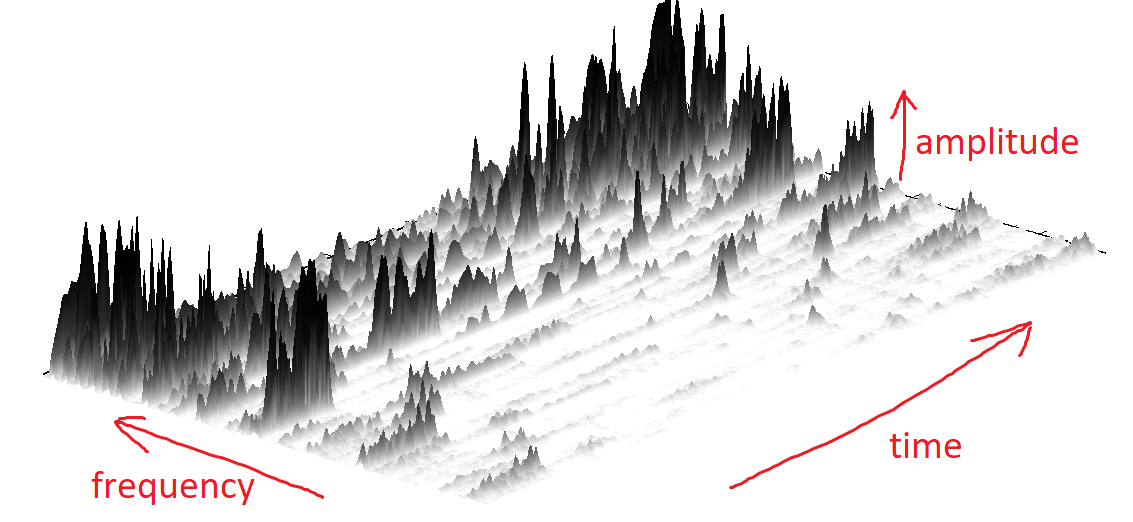
(Figure 1 Source:https://en.wikipedia.org/wiki/Spectrogram?fbclid=IwAR0Pzq_aS1hJtt-eEZxJyE1cZa6pEEKzYQBlhYer8x4CUOvHr_fOPkg89A8#/media/File:Spectrogram.png)

From the image below which represents a small slice of time. The number of crossings 0 is 15 



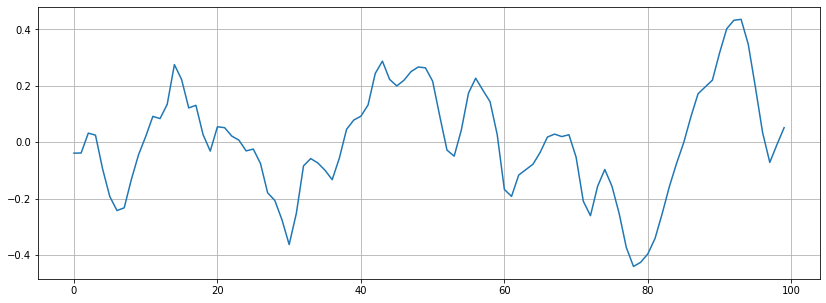

In [62]:
##### Step 3. Use the "wav_form_dB" decomposed song for Feature Extraction

# Feature 1: Zero-Crossing Rate 
## This represents how many times the frequency passes the "0" x-axis in either negative or positive direction
m0 = 10000
m1 = 10100
plt.figure(figsize=(14,5))
plt.plot(x[m0:m1])
plt.grid()
zero_crossing_sample = librosa.zero_crossings(x[m0:m1], pad=False)
print("From the image below which represents a small slice of time. The number of crossings " +
     "0 is {0} \n".format(sum(zero_crossing_sample)))


In [50]:
# Zero Crossing feature applied to entire song
zero_crossings = librosa.zero_crossings(x)
print("When this idea of zero crossings is extended to the entire 30 second portion of a song, this song has " +
     "{0} zero crossings".format(sum(zero_crossings)))

When this idea of zero crossings is extended to the entire 30 second portion of a song, this song has 97629 zero crossings


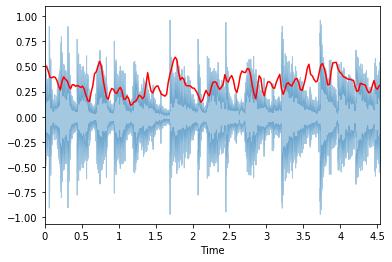

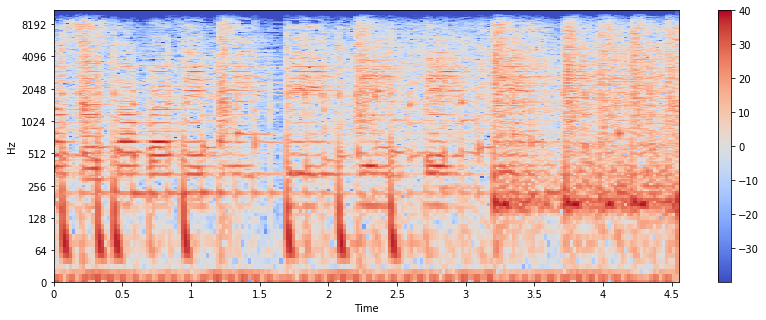

In [78]:
# Feature 2: Spectral Centroid 
## This feature represents taking a "slice" of a song and then taking the average of all frequencies at the
## point in time the slice represents. Extend this idea to ALL slices that make up a song, and
## using these averages plot a line that traverses exactly through each point, this is the Spectral Centroid
## of a song. This is important because two different genres may "generally" have a different spectral centroid line.

# Smaller Sample taken for demonstration below
n0 = 100000
n1 = 200000
x_sample = x[n0:n1]
spectral_centroids_sample = librosa.feature.spectral_centroid(x_sample, sr=sampling_rate)[0]
spectral_centroids.shape

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalize
def normalize(x_sample, axis=0):
    return sklearn.preprocessing.minmax_scale(x_sample, axis=axis)

librosa.display.waveplot(x_sample, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

## Alternative representations




##TODO: add appropriate plot titles 
wav_form_sample_f2 = librosa.stft(x_sample)
wav_form_db_sample_f2 = librosa.amplitude_to_db(abs(wav_form_sample_f2))
plt.figure(figsize=(16,7))
librosa.display.specshow(wav_form_db_sample_f2, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar()

##TODO:(JOHN) Fix the following :: librosa.display.specshow(librosa.amplitude_to_db(spectral_centroids_sample),y_axis='log', x_axis='time')
## TODO: Add comment to describe code above. Change code above slightly also.
## TODO: Add comment describing image below.

In [91]:
# Full song taken as spectral_centroid

spectral_centroids = librosa.feature.spectral_centroid(x, sr=sampling_rate)[0]
print(spectral_centroids.shape)

(1293,)


(1293,)


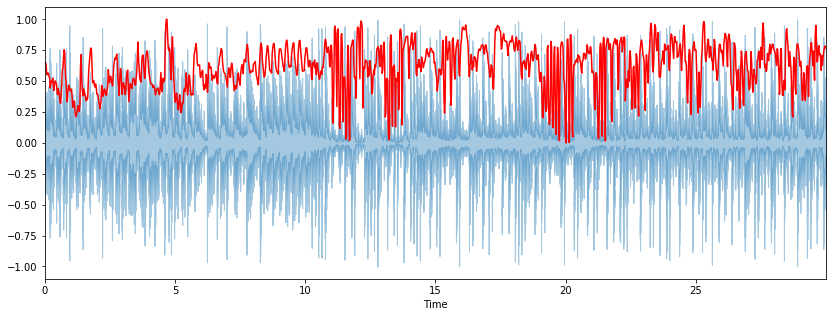

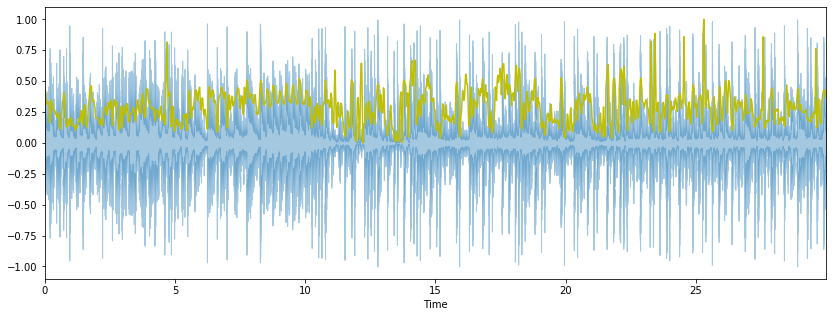

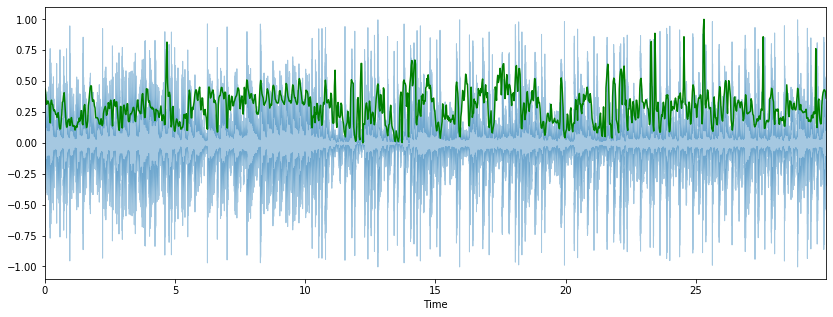

In [90]:
# Feature 3: Spectral Roll-off
### For a single slice the total "Energy" of all frequencies that represent the slice, always equal "100%".
### Spectral Roll-Off takes as many as possible composite frequencies such that the total number of energy is equal
### to some user-defined spectral roll-off percentage, for example, 85%. It adds these composite frequencies in order of
### highest frequencies in terms of Hz, to lower frequencies. This approach is applied to the entire song at each slice
### which ends up creating a series of points on a graph that are joined together by a line passing directly through all
### points to create the Spectral Roll-off.


# Smaller Sample taken for demonstration below
## Spectral Roll Percent at 85% 
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sampling_rate, roll_percent=0.85)[0]
plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

print(spectral_rolloff.shape)

## Spectral Roll Percent at 45%
spectral_rolloff_2= librosa.feature.spectral_rolloff(x+0.01, sr=sampling_rate, roll_percent=0.45)[0]
plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff_2), color='y')

## Spectral Roll Percent at 10%
spectral_rolloff_3= librosa.feature.spectral_rolloff(x+0.01, sr=sampling_rate, roll_percent=0.1)[0]
plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff_2), color='g')

##TODO: Explain difference in the 3 graphs and add labels and axis 

##TODO: Add spectral reprisentation to the roll off frequency as an alternative data visualization IOT synch with feature 2 
## and to add extra from the DS post. 

(20, 1293)


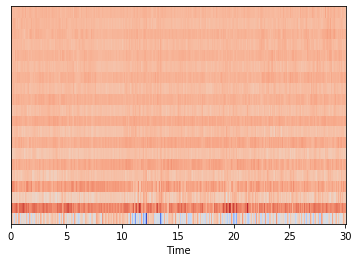

In [93]:
# Feature 4: Mel-Frequency Cepstral Coefficients (MFCC)
## This feature represents: This feature is a way to represent human auditory sounds

mfccs = librosa.feature.mfcc(x, sr=sampling_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

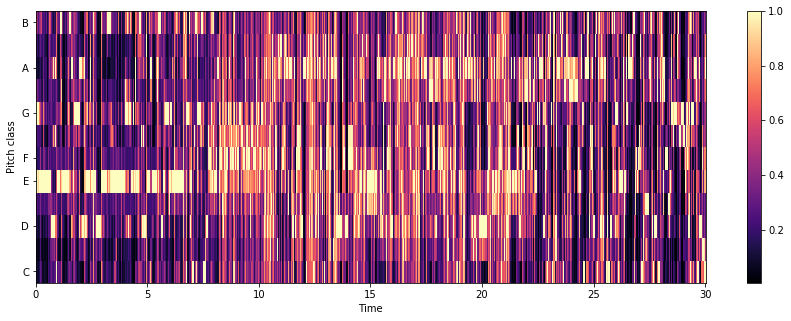

In [99]:
# Feature 5: Chroma Frequencies
## This feature represents: This will will divide the spectrum in to 12 distinct semitones that represent that
## represent a musical octave, for the entire song.

chromagram = librosa.feature.chroma_stft(x, sr=sampling_rate, )
plt.figure(figsize=(15,5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma')
plt.colorbar()